In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
data= pd.read_csv('./movielens/movies.csv')
data.shape

(27278, 3)

In [3]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#number of unique movies
movies = data['movieId'].unique().tolist()
len(movies)

27278

In [5]:
ratings_data=pd.read_csv('./movielens/ratings.csv',sep=',')
ratings_data.shape

(1048575, 4)

In [6]:
ratings_data.mean()

userId       3.527086e+03
movieId      8.648988e+03
rating       3.529272e+00
timestamp    1.096036e+09
dtype: float64

In [7]:
ratings_data.describe()

,userId,movieId,rating,timestamp
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.527086e+03,8.648988e+03,3.529272e+00,1.096036e+09
std,2.018424e+03,1.910014e+04,1.051919e+00,1.594899e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,8.254999e+08
25%,1.813000e+03,9.030000e+02,3.000000e+00,9.658382e+08
50%,3.540000e+03,2.143000e+03,4.000000e+00,1.099263e+09
75%,5.233000e+03,4.641000e+03,4.000000e+00,1.217407e+09
max,7.120000e+03,1.306420e+05,5.000000e+00,1.427764e+09


In [8]:
ratings_data['rating'].mode() #calculating mode

0    4.0
dtype: float64

In [9]:
ratings_data['rating'].std() #calculating standard deviation

1.0519187535891295

In [10]:
#minimum rating given to a movie
ratings_data['rating'].min() 

0.5

In [11]:
#maximum rating given to a movie
ratings_data['rating'].max()

5.0

In [12]:
#data cleaning
data.shape

(27278, 3)

In [13]:
#is any row null
data.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [14]:
ratings_data.shape

(1048575, 4)

In [15]:
#is any row null there
ratings_data.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [16]:
tags_data=pd.read_csv('./movielens/tags.csv',sep=',')
tags_data.shape


(465564, 4)

In [17]:
#is any row null in tags.csv
tags_data.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [18]:
tags_data=tags_data.dropna()

In [19]:
tags_data.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [20]:
unique_tags=tags_data['tag'].unique().tolist()
len(unique_tags)


38643

In [21]:
#list of drama movies
drama_movies=data['genres'].str.contains('Drama')
data[drama_movies].head()

,movieId,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Crime|Drama
16,17,Sense and Sensibility (1995),Drama|Romance


In [22]:
#total number of drama movies
drama_movies.shape

(27278,)

In [23]:
#list of comedy movies
comedy_movies = data['genres'].str.contains('Comedy')
data[comedy_movies].head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


In [24]:
#total no. of comedy movies
comedy_movies.shape

(27278,)

In [25]:
#search movie id by tag search
tag_search = tags_data['tag'].str.contains('dark')
tags_data[tag_search].head()

,userId,movieId,tag,timestamp
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
4,65,592,dark hero,1368150078
21,65,6874,dark hero,1368150079
51,121,778,dark comedy,1300852846


In [26]:
#displays first 5 data from a dataframe
#here rating.csv has 4 columns
ratings_data.head() 

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [27]:
del ratings_data['timestamp']

In [28]:
#displays first 5 data from a dataframe
#here ratings.csv has 3 columns
ratings_data.head() 

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [29]:
#displays first 5 data from a dataframe
#here movies.csv has 3 columns
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [30]:
#merging two dataframes "movies.csv" and "ratings.csv"
movie_data_ratings_data=data.merge(ratings_data,on = 'movieId',how = 'inner')
movie_data_ratings_data.head(3)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0


In [31]:
#movie rated high or not in boolean
high_rated= movie_data_ratings_data['rating']>4.0
print(high_rated)

0          False
1           True
2          False
3          False
4           True
5          False
6          False
7           True
8          False
9           True
10         False
11         False
12         False
13         False
14          True
15          True
16         False
17         False
18         False
19          True
20          True
21         False
22         False
23         False
24          True
25          True
26         False
27         False
28          True
29         False
           ...  
1048545    False
1048546    False
1048547    False
1048548    False
1048549    False
1048550    False
1048551    False
1048552    False
1048553    False
1048554    False
1048555    False
1048556    False
1048557     True
1048558    False
1048559    False
1048560    False
1048561    False
1048562    False
1048563    False
1048564    False
1048565    False
1048566    False
1048567    False
1048568    False
1048569    False
1048570     True
1048571    False
1048572    Fal

In [32]:

# high_rated= movie_data_ratings_data['rating']>4.0
movie_data_ratings_data[high_rated].head(10)

,movieId,title,genres,userId,rating
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,5.0
14,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34,5.0
15,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,39,5.0
19,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,58,5.0
20,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,59,4.5
24,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,82,5.0
25,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,84,5.0


In [33]:
low_rated = movie_data_ratings_data['rating']<4.0
movie_data_ratings_data[low_rated].head()

,movieId,title,genres,userId,rating
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16,3.0
10,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,22,3.0
13,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,3.0
16,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,47,1.0
23,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,80,3.0


In [34]:
#total number of unique movie genre
unique_genre=data['genres'].unique().tolist()
len(unique_genre)

1342

In [35]:
#top 25 most rated movies
most_rated = movie_data_ratings_data.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head()

title
Pulp Fiction (1994)                 3498
Forrest Gump (1994)                 3476
Silence of the Lambs, The (1991)    3247
Shawshank Redemption, The (1994)    3216
Jurassic Park (1993)                3129
dtype: int64

In [36]:
#slicing out columns to display only title and genres columns
data[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [37]:
# here we extract year from title
data['year'] =data['title'].str.extract('.*\((.*)\).*',expand = False)
data.head(5)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [38]:
#define a function that counts the number of times each genre appear:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [39]:
#here we  make census of the genres:
genre_labels = set()
for s in data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [40]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(data, 'genres', genre_labels)
keyword_occurences

[['Drama', 13344],
 ['Comedy', 8374],
 ['Thriller', 4178],
 ['Romance', 4127],
 ['Action', 3520],
 ['Crime', 2939],
 ['Horror', 2611],
 ['Documentary', 2471],
 ['Adventure', 2329],
 ['Sci-Fi', 1743],
 ['Mystery', 1514],
 ['Fantasy', 1412],
 ['War', 1194],
 ['Children', 1139],
 ['Musical', 1036],
 ['Animation', 1027],
 ['Western', 676],
 ['Film-Noir', 330],
 ['(no genres listed)', 246],
 ['IMAX', 196]]

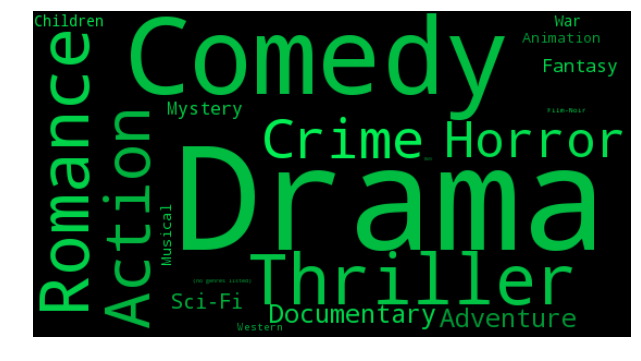

In [41]:
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


#Finally, the result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

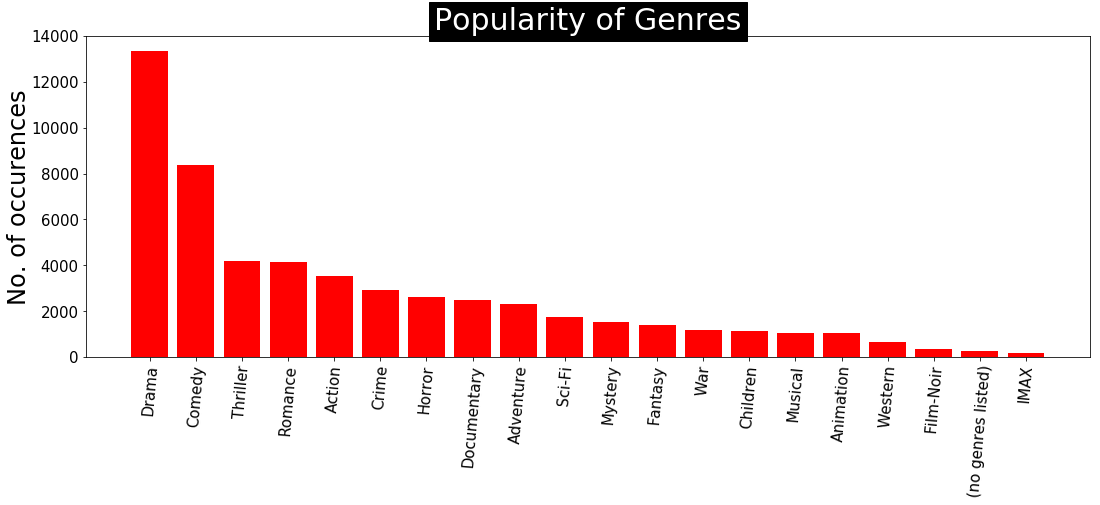

In [42]:
# lets display the same result in the histogram
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()